In [184]:
#Import dependencies for the model
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import ensemble
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score as auc
import time
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import ensemble
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score as auc
import time
py.init_notebook_mode()
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import metrics

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [318]:
#Data Set has been consolidated into a single sheet by pre-processing

#read the test data
df = pd.read_excel('Prep Data.xlsx',sheetname='train')
#read the test data
df_test = pd.read_excel('Prep Data.xlsx',sheetname='test')
#reading the combined test and train data
df_full = pd.read_excel('Prep Data.xlsx',sheetname='consolidate')

In [186]:
#imputing the NA's column with '1', as the class is under represented
df['cancel']=df['cancel'].replace(-1,1)

In [187]:
#View the data
df.head()

,cancel,claim.ind,coverage.type,credit,dwelling.type,house.color,id,len.at.res,credit-agecat,state-crdit,...,Standardize[totmem],Standardize[premimem],Standardize[ageresi],Standardize[agetenu],Standardize[premium],Prob(cancel==0),Prob(cancel==1),Most Likely cancel,cust leaving children age,customer leaving from premium and age category probability
0,1,1,C,high,House,white,5119,15.000000,high-A,IA-high,...,1.155475,-0.900520,-1.887280,-1.302841,-0.095153,0.723871,0.276129,0,Low,Low
1,1,1,A,high,House,red,4268,30.319113,high-A,CO-high,...,-0.342206,-0.098437,-3.070329,-1.302841,1.487451,0.762743,0.237257,0,Med,Low
2,1,0,B,low,Tenant,white,2251,11.000000,low-A,PA-low,...,0.032215,-0.570255,-1.501145,-1.202040,-0.550900,0.499887,0.500113,1,Low,Low
3,0,0,C,medium,Condo,blue,4316,11.000000,medium-A,IA-medium,...,-0.342206,-0.320642,-1.501145,-1.302841,-0.776792,0.673411,0.326589,0,Med,Low
4,1,0,C,low,Tenant,yellow,6372,12.000000,low-A,PA-low,...,-0.716626,0.391623,-1.578372,-1.202040,0.444543,0.499887,0.500113,1,Low,Low


In [189]:
#correcting the data types of our columns

df['Claim_ind'] = df['Claim_ind'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['year'] = df['year'].astype('category')
df['zip_code'] = df['zip_code'].astype('category')


In [190]:
df.head()

,cancel,Claim_ind,Coverage_type,credit,dwelling_type,house_color,Id,len_residence,Credit_agecat,State_credit,...,std_totmem,std_premium_mem,std_age_resi,std_age_tenure,std_premium,prob0,prob1,like_cancel,cust_age_children_link,cust_prem_age_link
0,1,1,C,high,House,white,5119,15.000000,high-A,IA-high,...,1.155475,-0.900520,-1.887280,-1.302841,-0.095153,0.723871,0.276129,0,Low,Low
1,1,1,A,high,House,red,4268,30.319113,high-A,CO-high,...,-0.342206,-0.098437,-3.070329,-1.302841,1.487451,0.762743,0.237257,0,Med,Low
2,1,0,B,low,Tenant,white,2251,11.000000,low-A,PA-low,...,0.032215,-0.570255,-1.501145,-1.202040,-0.550900,0.499887,0.500113,1,Low,Low
3,0,0,C,medium,Condo,blue,4316,11.000000,medium-A,IA-medium,...,-0.342206,-0.320642,-1.501145,-1.302841,-0.776792,0.673411,0.326589,0,Med,Low
4,1,0,C,low,Tenant,yellow,6372,12.000000,low-A,PA-low,...,-0.716626,0.391623,-1.578372,-1.202040,0.444543,0.499887,0.500113,1,Low,Low


In [181]:
#After feature engineering and pre-processing the data and performing the analysis in SAS-JMP and Excel
# we found the following variables to have a better predictive capacity of our model

In [191]:
#create a new dataframe for our predictors
trainDataframe=df[['Id','cancel','state','sales_channel','year','Claim_ind','gender','credit','marital_status','tot_members','std_prem_per_age','Coverage_type','house_color','std_age_resi','std_tenure_resi','Credit_agecat']]

In [192]:
#separate the features and target column
trainLabels = trainDataFrame['cancel']
trainFeatures = trainDataFrame.drop(['Id','cancel'], axis=1)

In [193]:
#One-Hot-Encode the categorical columns
trainFeatures=pd.get_dummies(trainFeatures,columns=['Credit_agecat','Coverage_type','house_color','sales_channel','year','Claim_ind','gender','credit','marital_status','state'],drop_first=True)

In [194]:
#Use a Gradient Boosting classifier to estimate each feature predictive power (using AUC metric)
verySimpleLearner = ensemble.GradientBoostingClassifier(n_estimators=10, max_features=1, max_depth=3,
                                                        min_samples_leaf=100,learning_rate=0.3, subsample=0.65,
                                                        loss='deviance', random_state=1)

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, test_size=0.5, random_state=1)
        
startTime = time.time()
singleFeatureAUC_list = []
singleFeatureAUC_dict = {}
for feature in X_train.columns:
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    trainAUC = auc(y_train, verySimpleLearner.predict_proba(trainInputFeature)[:,1])
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
        
    singleFeatureAUC_list.append(validAUC)
    singleFeatureAUC_dict[feature] = validAUC
        
validAUC = np.array(singleFeatureAUC_list)
timeToTrain = (time.time()-startTime)/60
print("(min,mean,max) AUC = (%.3f,%.3f,%.3f). took %.2f minutes" %(validAUC.min(),validAUC.mean(),validAUC.max(), timeToTrain))

(min,mean,max) AUC = (0.491,0.519,0.596). took 0.02 minutes


In [195]:
#Single feature evaluation 
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, 
                                                                       test_size=0.5, random_state=1)

verySimpleLearner = ensemble.GradientBoostingClassifier(n_estimators=20, max_features=1, max_depth=3, 
                                                        min_samples_leaf=100, learning_rate=0.1, 
                                                        subsample=0.65, loss='deviance', random_state=1)


startTime = time.time()
singleFeatureTable = pd.DataFrame(index=range(len(X_train.columns)), columns=['feature','AUC'])
for k,feature in enumerate(X_train.columns):
    trainInputFeature = X_train[feature].values.reshape(-1,1)
    validInputFeature = X_valid[feature].values.reshape(-1,1)
    verySimpleLearner.fit(trainInputFeature, y_train)
    
    validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeature)[:,1])
    singleFeatureTable.ix[k,'feature'] = feature
    singleFeatureTable.ix[k,'AUC'] = validAUC
        
print("finished evaluating single features. took %.2f minutes" %((time.time()-startTime)/60))

finished evaluating single features. took 0.02 minutes


In [196]:
#Sort the features according to AUC and present the table
singleFeatureTable = singleFeatureTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

singleFeatureTable.ix[:15,:]

,feature,AUC
0,credit_low,0.596102
1,sales_channel_Phone,0.578584
2,year_2014,0.542405
3,state_PA,0.536091
4,Credit_agecat_high-C,0.535281
5,year_2016,0.534312
6,tot_members,0.531546
7,Claim_ind_1,0.530488
8,Credit_agecat_high-B,0.530074
9,Credit_agecat_low-B,0.528395


(min,mean,max) AUC = (0.525,0.562,0.650). took 0.1 minutes


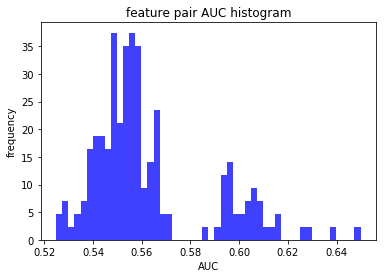

In [197]:
# Combine the single feature variables to form a pair and evaluate their AUC
numFeaturesToUse = 20
featuresToUse = singleFeatureTable.ix[0:numFeaturesToUse-1,'feature']

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, test_size=0.5, random_state=1)
    
startTime = time.time()
featurePairAUC_list = []
featurePairAUC_dict = {}

for feature1Ind in range(len(featuresToUse)-1):
    featureName1 = featuresToUse[feature1Ind]
    trainInputFeature1 = X_train[featureName1].values.reshape(-1,1)
    validInputFeature1 = X_valid[featureName1].values.reshape(-1,1)

    for feature2Ind in range(feature1Ind+1,len(featuresToUse)-1):
        featureName2 = featuresToUse[feature2Ind]
        trainInputFeature2 = X_train[featureName2].values.reshape(-1,1)
        validInputFeature2 = X_valid[featureName2].values.reshape(-1,1)

        trainInputFeatures = np.hstack((trainInputFeature1,trainInputFeature2))
        validInputFeatures = np.hstack((validInputFeature1,validInputFeature2))
        
        verySimpleLearner.fit(trainInputFeatures, y_train)
        
        trainAUC = auc(y_train, verySimpleLearner.predict_proba(trainInputFeatures)[:,1])
        validAUC = auc(y_valid, verySimpleLearner.predict_proba(validInputFeatures)[:,1])
            
        featurePairAUC_list.append(validAUC)
        featurePairAUC_dict[(featureName1,featureName2)] = validAUC
        
validAUC = np.array(featurePairAUC_list)
timeToTrain = (time.time()-startTime)/60
print("(min,mean,max) AUC = (%.3f,%.3f,%.3f). took %.1f minutes" % (validAUC.min(),validAUC.mean(),validAUC.max(), timeToTrain))

# show the histogram of the feature combinations performance 
plt.figure(); plt.hist(validAUC, 50, normed=1, facecolor='blue', alpha=0.75)
plt.xlabel('AUC'); plt.ylabel('frequency'); plt.title('feature pair AUC histogram'); plt.show()


In [198]:
#Display the results of the best 20 combinations of pairs as a table

featureCombinationsTable = pd.DataFrame(index=range(len(featurePairAUC_list)), columns=['feature1','feature2','AUC'])
for k,key in enumerate(featurePairAUC_dict):
    featureCombinationsTable.ix[k,'feature1'] = key[0]
    featureCombinationsTable.ix[k,'feature2'] = key[1]
    featureCombinationsTable.ix[k,'AUC'] = featurePairAUC_dict[key]
featureCombinationsTable = featureCombinationsTable.sort_values(by='AUC', axis=0, ascending=False).reset_index(drop=True)

featureCombinationsTable.ix[:20,:]


,feature1,feature2,AUC
0,credit_low,sales_channel_Phone,0.649789
1,credit_low,credit_medium,0.639401
2,credit_low,year_2014,0.627363
3,credit_low,tot_members,0.626005
4,credit_low,state_PA,0.616133
5,credit_low,year_2016,0.615137
6,credit_low,state_VA,0.614075
7,credit_low,std_age_resi,0.611293
8,credit_low,Credit_agecat_high-E,0.608086
9,credit_low,Claim_ind_1,0.607882


(min,max) AUC = (0.6527,0.7255). took 0.6 minutes


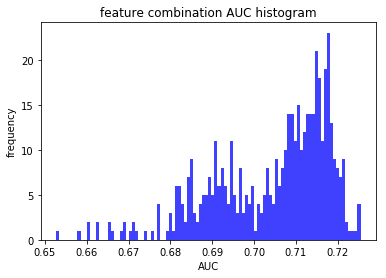

In [199]:
#Now use the single feature combinations to form a group of predictors and evaluate them as per AUC score
numFeaturesInCombination = 16
numCombinations = 500
numBestSingleFeaturesToSelectFrom = 20

X_train, X_valid, y_train, y_valid = cross_validation.train_test_split(trainFeatures, trainLabels, 
                                                                       test_size=0.5, random_state=1)
weakLearner = ensemble.GradientBoostingClassifier(n_estimators=30, max_features=2, max_depth=3, 
                                                  min_samples_leaf=100,learning_rate=0.1, 
                                                  subsample=0.65, loss='deviance', random_state=1)

featuresToUse = singleFeatureTable.ix[0:numBestSingleFeaturesToSelectFrom-1,'feature']
featureColumnNames = ['feature'+str(x+1) for x in range(numFeaturesInCombination)]
featureCombinationsTable = pd.DataFrame(index=range(numCombinations), columns=featureColumnNames + ['combinedAUC'])

# for numCombinations iterations 
startTime = time.time()
for combination in range(numCombinations):
    # generate random feature combination
    randomSelectionOfFeatures = sorted(np.random.choice(len(featuresToUse), numFeaturesInCombination, replace=False))

    # store the feature names
    combinationFeatureNames = [featuresToUse[x] for x in randomSelectionOfFeatures]
    for i in range(len(randomSelectionOfFeatures)):
        featureCombinationsTable.ix[combination,featureColumnNames[i]] = combinationFeatureNames[i]

    # build features matrix to get the combination AUC
    trainInputFeatures = X_train.ix[:,combinationFeatureNames]
    validInputFeatures = X_valid.ix[:,combinationFeatureNames]
    # train learner
    weakLearner.fit(trainInputFeatures, y_train)
    # store AUC results
    validAUC = auc(y_valid, weakLearner.predict_proba(validInputFeatures)[:,1])        
    featureCombinationsTable.ix[combination,'combinedAUC'] = validAUC

validAUC = np.array(featureCombinationsTable.ix[:,'combinedAUC'])
print("(min,max) AUC = (%.4f,%.4f). took %.1f minutes" % (validAUC.min(),validAUC.max(), (time.time()-startTime)/60))

# show the histogram of the feature combinations performance 
plt.figure(); plt.hist(validAUC, 100, facecolor='blue', alpha=0.75)
plt.xlabel('AUC'); plt.ylabel('frequency'); plt.title('feature combination AUC histogram'); plt.show()

In [200]:
#Display the best combinations in the form of a table for 16 variables : 500 combinations tested
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,combinedAUC
0,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_high-D,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.725464
1,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_high-D,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.725464
2,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_low-B,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.725241
3,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Credit_agecat_high-B,Credit_agecat_low-B,Credit_agecat_high-D,credit_medium,Credit_agecat_low-C,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.724953
4,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.724519
5,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,std_prem_per_age,credit_medium,Credit_agecat_low-C,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.723382
6,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,credit_medium,Credit_agecat_low-C,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.723085
7,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,tot_members,Claim_ind_1,Credit_agecat_low-B,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.722328
8,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.722212
9,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.721778


In [182]:
#Display the best combinations in the form of a table for 16 variables : 5000 combinations tested
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,combinedAUC
0,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.727547
1,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.726552
2,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.726276
3,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,0.72612
4,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.726076
5,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.725894
6,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.72573
7,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.72569
8,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.72569
9,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.72569


In [179]:
#best feature combinations with 8 variables
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,combinedAUC
0,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.725894
1,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,0.725341
2,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,std_prem_per_age,credit_medium,Credit_agecat_low-C,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.723382
3,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.722916
4,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,Credit_agecat_medium-B,0.722469
5,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,tot_members,Credit_agecat_high-B,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.72201
6,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,state_VA,Credit_agecat_high-E,std_tenure_resi,Credit_agecat_medium-B,0.721877
7,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,std_age_resi,state_VA,sales_channel_Online,Credit_agecat_medium-B,0.721654
8,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Credit_agecat_high-B,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,Credit_agecat_high-E,sales_channel_Online,Credit_agecat_medium-B,0.72164
9,credit_low,sales_channel_Phone,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,Credit_agecat_high-D,std_prem_per_age,credit_medium,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.721472


In [170]:
#for 14 features and tested 500 combinations
featureCombinationsTable = featureCombinationsTable.sort_values(by='combinedAUC', axis=0, ascending=False).reset_index(drop=True)
featureCombinationsTable.ix[:20,:]

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,combinedAUC
0,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-D,std_prem_per_age,credit_medium,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.725311
1,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,tot_members,Claim_ind_1,Credit_agecat_high-B,Credit_agecat_low-B,credit_medium,std_age_resi,state_VA,sales_channel_Online,std_tenure_resi,0.723709
2,credit_low,sales_channel_Phone,year_2014,state_PA,year_2016,tot_members,Claim_ind_1,std_prem_per_age,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.721281
3,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,tot_members,Credit_agecat_high-D,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.721229
4,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-D,credit_medium,std_age_resi,state_VA,Credit_agecat_high-E,sales_channel_Online,0.721005
5,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,credit_medium,std_age_resi,state_VA,sales_channel_Online,Credit_agecat_medium-B,0.720903
6,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-D,credit_medium,state_VA,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.720229
7,credit_low,sales_channel_Phone,year_2014,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_low-B,std_prem_per_age,credit_medium,Credit_agecat_low-C,state_VA,sales_channel_Online,0.720209
8,credit_low,sales_channel_Phone,year_2014,state_PA,tot_members,Credit_agecat_high-B,Credit_agecat_low-B,std_prem_per_age,credit_medium,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,Credit_agecat_medium-B,0.720142
9,credit_low,sales_channel_Phone,state_PA,Credit_agecat_high-C,year_2016,tot_members,Claim_ind_1,Credit_agecat_high-B,std_prem_per_age,credit_medium,state_VA,Credit_agecat_high-E,sales_channel_Online,std_tenure_resi,0.719033


In [320]:
#drop the unnecessary columns
df_test=df_test.drop('train/test', axis=1)
df_test=df_test.drop('Column 1', axis=1)

In [321]:
#correct the data types
df_test['claim.ind'] = df_test['claim.ind'].astype('category')
df_test['ni.marital.status'] = df_test['ni.marital.status'].astype('category')
df_test['year'] = df_test['year'].astype('category')
df_test['zip.code'] = df_test['zip.code'].astype('category')


In [291]:
#checking the shape of our test data
df_test.shape

(2412, 50)

In [323]:
#rename the columns for test data
df_test=df_test.rename(columns={ df_test.columns[1]: "Claim_ind" })
df_test=df_test.rename(columns={ df_test.columns[2]: "Coverage_type" })
df_test=df_test.rename(columns={ df_test.columns[4]: "dwelling_type" })
df_test=df_test.rename(columns={ df_test.columns[5]: "house_color" })
df_test=df_test.rename(columns={ df_test.columns[6]: "Id" })
df_test=df_test.rename(columns={ df_test.columns[7]: "len_residence" })
df_test=df_test.rename(columns={ df_test.columns[8]: "Credit_agecat" })
df_test=df_test.rename(columns={ df_test.columns[9]: "State_credit" })
df_test=df_test.rename(columns={ df_test.columns[10]: "Credit_claim" })
df_test=df_test.rename(columns={ df_test.columns[11]: "ClaimInd_Premium" })
df_test=df_test.rename(columns={ df_test.columns[12]: "Premium_per_age" })
df_test=df_test.rename(columns={ df_test.columns[13]: "tenure_per_age" })
df_test=df_test.rename(columns={ df_test.columns[14]: "tenure_per_residence" })
df_test=df_test.rename(columns={ df_test.columns[15]: "premium_totalmem" })
df_test=df_test.rename(columns={ df_test.columns[16]: "premium_per_residence" })
df_test=df_test.rename(columns={ df_test.columns[17]: "adults" })
df_test=df_test.rename(columns={ df_test.columns[18]: "children" })
df_test=df_test.rename(columns={ df_test.columns[19]: "age" })
df_test=df_test.rename(columns={ df_test.columns[20]: "age_bin" })
df_test=df_test.rename(columns={ df_test.columns[21]: "age_cat" })
df_test=df_test.rename(columns={ df_test.columns[22]: "gender" })
df_test=df_test.rename(columns={ df_test.columns[23]: "marital_status" })
df_test=df_test.rename(columns={ df_test.columns[24]: "premium" })
df_test=df_test.rename(columns={ df_test.columns[25]: "premium_cat" })
df_test=df_test.rename(columns={ df_test.columns[26]: "premium_cat2" })
df_test=df_test.rename(columns={ df_test.columns[27]: "sales_channel" })
df_test=df_test.rename(columns={ df_test.columns[30]: "zip_code" })
df_test=df_test.rename(columns={ df_test.columns[32]: "tenure_dif_resi" })
df_test=df_test.rename(columns={ df_test.columns[33]: "premium_age" })
df_test=df_test.rename(columns={ df_test.columns[34]: "tot_members" })
df_test=df_test.rename(columns={ df_test.columns[35]: "premium_per_mem" })
df_test=df_test.rename(columns={ df_test.columns[36]: "age_dif_residence" })
df_test=df_test.rename(columns={ df_test.columns[37]: "age_dif_tenure" })
df_test=df_test.rename(columns={ df_test.columns[38]: "std_prem_per_age" })
df_test=df_test.rename(columns={ df_test.columns[39]: "std_residence" })
df_test=df_test.rename(columns={ df_test.columns[40]: "std_age" })
df_test=df_test.rename(columns={ df_test.columns[41]: "std_tenure" })
df_test=df_test.rename(columns={ df_test.columns[42]: "std_tenure_resi" })
df_test=df_test.rename(columns={ df_test.columns[43]: "std_premIum_age" })#exclude
df_test=df_test.rename(columns={ df_test.columns[44]: "std_totmem" })
df_test=df_test.rename(columns={ df_test.columns[45]: "std_premium_mem" })
df_test=df_test.rename(columns={ df_test.columns[46]: "std_age_resi" })
df_test=df_test.rename(columns={ df_test.columns[47]: "std_age_tenure" })
df_test=df_test.rename(columns={ df_test.columns[48]: "cust_age_children_link" })
df_test=df_test.rename(columns={ df_test.columns[49]: "cust_prem_age_link" })

In [324]:
#sort by id column
df_test = df_test.sort_values(by=['Id'], ascending=True)

In [296]:
#select the features for the train set
trainDataFrame=df[['Id','marital_status','cancel','sales_channel','year','state','tot_members','Claim_ind','Credit_agecat','std_prem_per_age','credit','std_age_resi','std_tenure_resi']]

In [297]:
#separate labels and features
trainLabels = trainDataFrame['cancel']
trainFeatures = trainDataFrame.drop(['Id','cancel'], axis=1)

In [298]:
trainFeatures.dtypes

marital_status      category
sales_channel         object
year                category
state                 object
tot_members            int64
Claim_ind           category
Credit_agecat         object
std_prem_per_age     float64
credit                object
std_age_resi         float64
std_tenure_resi      float64
dtype: object

In [267]:
#select the features for the train set
testFeatures=df_test[['Id','marital_status','sales_channel','year','state','tot_members','Claim_ind','Credit_agecat','std_prem_per_age','credit','std_age_resi','std_tenure_resi']]

In [299]:
trainFeatures=pd.get_dummies(trainFeatures,columns=['marital_status','sales_channel','year','Claim_ind','credit','Credit_agecat','state'],drop_first=True)

In [300]:
#Modeling as per the documentation of SKlearn on train set 
X=trainFeatures
y=trainLabels

In [247]:
#To understand feature importances apply Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150, max_depth=4, min_samples_leaf=4, max_features=0.2, n_jobs=-1, random_state=0)
rf.fit(X,y)
features = X.columns

In [248]:
#plot feature importances using plotly
x, y = (list(x) for x in zip(*sorted(zip(rf.feature_importances_, features), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Significance of features',
     width = 900, height = 800,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ))

fig1 = go.Figure(data=[trace2])
fig1['layout'].update(layout)
py.plot(fig1)

'file:///home/ashish/Downloads/travelers/temp-plot.html'

In [268]:
#Split the training data into train and test and use stratified split of y 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=10, stratify=y)

In [269]:
#logistic regression
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))




 ---Logistic Model---
Logistic AUC = 0.68
             precision    recall  f1-score   support

          0       0.86      0.71      0.78      1713
          1       0.42      0.65      0.51       561

avg / total       0.75      0.70      0.71      2274



In [234]:
#random forest
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=8, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))




 ---Random Forest Model---
Random Forest AUC = 0.62
             precision    recall  f1-score   support

          0       0.81      0.88      0.84      1713
          1       0.49      0.35      0.41       561

avg / total       0.73      0.75      0.73      2274



In [270]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
print(results)


AUC: 0.725 (0.025)
[ 0.68890707  0.74141794  0.71902802  0.77268145  0.69689491  0.71554298
  0.72792638  0.74450798  0.74047619  0.69942325]


In [263]:
# Using 10 fold Cross-Validation to train our random forest Regression Model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
kfold = model_selection.KFold(n_splits=5, random_state=0)
rfCV = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=8, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
scoring = 'roc_auc'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring='roc_auc')
print("roc: %.3f (%.3f)" % (results.mean(), results.std()))


roc: 0.707 (0.016)


In [237]:
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))




 ---Logistic Model---
Logistic AUC = 0.68
             precision    recall  f1-score   support

          0       0.86      0.72      0.78      1713
          1       0.42      0.64      0.51       561

avg / total       0.75      0.70      0.71      2274



In [264]:
#import the model for Logistic regression
from sklearn.linear_model import LogisticRegression 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0)

# Initialize logistic regression model
logis=LogisticRegression(random_state=42)

logis.fit(X_train, y_train) #fitting the model with the logistic Regression Model
#calculate the training and Testing score
logis_score_train = logis.score(X_train,y_train)
print("Training score: ", logis_score_train)
logis_score_test = logis.score(X_test,y_test)
print("Testing score: ", logis_score_test)

('Training score: ', 0.78126031012867037)
('Testing score: ', 0.76055408970976257)


('Area Under the Curve:', 0.71556842765764161)


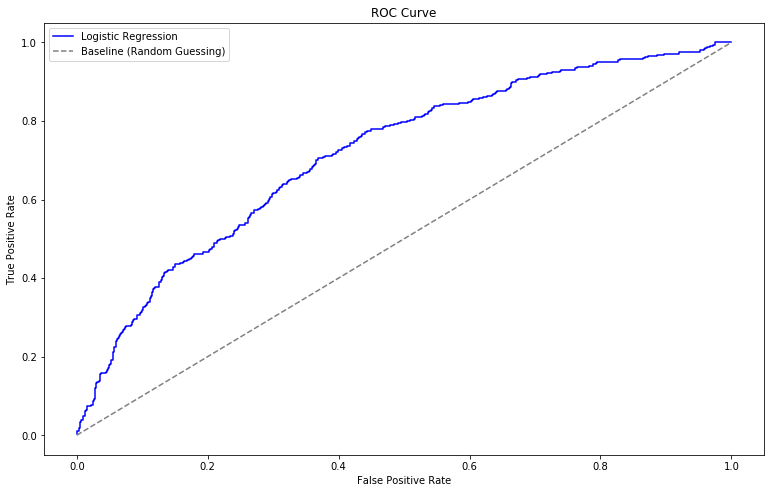

In [265]:
#we use ROC curve for visualization of the true positive rate(TPR) against the false positive rate(FPR)
from sklearn.metrics import roc_curve, roc_auc_score #import the modules for the curve and metrics
probabilities = logis.predict_proba(X_test) #To plot the curve, probability estimates are used
#and they are calculated with the logistic regression classifier
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1]) #curve is calculated for the entries in 
#y_test against their calculated prediction with logistic regression classifier
#the roc curve functionality returns fpr, tpr, thresholds; for further information see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr}) #the returned values 
#are saved in a dataframe

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='b', label='Logistic Regression')
rocax.plot([0,1],[0,1],color='gray',ls='--',label='Baseline (Random Guessing)') #plot of angle bisectrix 
rocax.set_xlabel('False Positive Rate') #labeling x-axis
rocax.set_ylabel('True Positive Rate')  #labeling y-axis
rocax.set_title('ROC Curve')  #labeling the diagram itself
rocax.legend() # showing the legend

print('Area Under the Curve:', roc_auc_score(y_test, probabilities[:,1])) 
#calculating and printing AUC = Area Under the Curve

In [266]:
# Using 10 fold Cross-Validation to train our Logistic Regression Model
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression(class_weight = "balanced")
scoring = 'roc_auc'
results = model_selection.cross_val_score(modelCV, X, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))
print(results)

AUC: 0.730 (0.013)
[ 0.71662683  0.72477773  0.71178503  0.72061822  0.72474222  0.74422388
  0.73098101  0.72684776  0.75820771  0.73686131]


In [271]:
   #use grid search CV for logistic regression
    import numpy as np
    from sklearn.cross_validation import KFold
    from sklearn.linear_model import LogisticRegression
    from sklearn.grid_search import GridSearchCV
    from sklearn.linear_model import LogisticRegressionCV

    fold = KFold(len(y), n_folds=5, shuffle=True, random_state=777)

In [272]:
#find the best score
grid = {
        'C': np.power(10.0, np.arange(-10, 10))
         , 'solver': ['newton-cg']
    }
clf = LogisticRegression(penalty='l2', random_state=777, max_iter=10000, tol=10)
gs = GridSearchCV(clf, grid, scoring='roc_auc', cv=fold)
gs.fit(X, y)
print ('gs.best_score_:', gs.best_score_)

('gs.best_score_:', 0.7305109930879257)


In [273]:
#find the maximum score
searchCV = LogisticRegressionCV(
        Cs=list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=fold
        ,random_state=777
        ,max_iter=10000
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=10
    )
searchCV.fit(X, y)

print ('Max auc_roc:', searchCV.scores_[1].max())

('Max auc_roc:', 0.75285959625417198)


In [274]:
#2. Logistic regression with L1 penalty and features scaled
# C=0.1 with L1 penalty
logreg = LogisticRegression(C=0.10000000000000001, penalty='l1')
logreg.fit(X, y)
print logreg.coef_

#calculate the training and Testing score
logis_score_train = logreg.score(X_train,y_train)
print("Training score: ", logis_score_train)
logis_score_test = logreg.score(X_test,y_test)
print("Testing score: ", logis_score_test)

[[ 0.10979144  0.06346478 -0.17934905  0.21883003 -0.25120915  0.61220318
   0.73503464  0.5116363   0.25763963 -0.01153904  0.30051878  1.3094053
   0.58564856  0.         -0.0389636   0.         -0.04486973  0.
   0.06957598  0.          0.          0.          0.          0.10090519
   0.          0.          0.         -0.20843505 -0.07398867 -0.60322873
   0.77987751  0.        ]]
('Training score: ', 0.77055052790346912)
('Testing score: ', 0.77484608619173267)


('Area Under the Curve:', 0.74350281427648268)


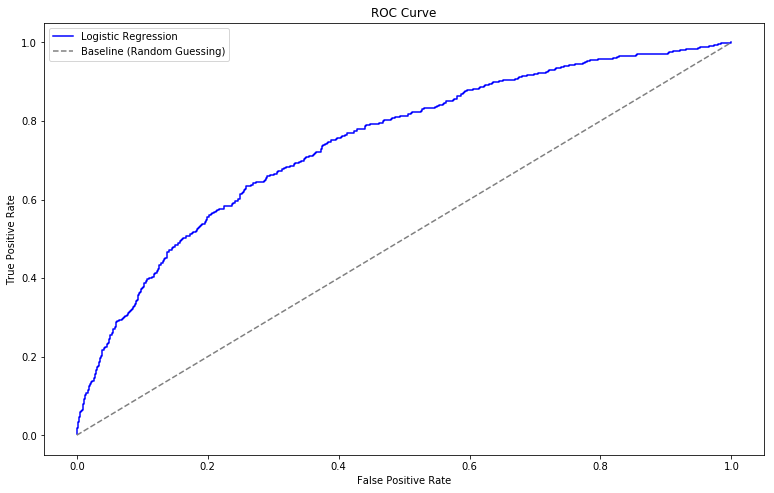

In [275]:
from sklearn.metrics import roc_curve, roc_auc_score #import the modules for the curve and metrics
probabilities = logis.predict_proba(X_test) #To plot the curve, probability estimates are used
#and they are calculated with the logistic regression classifier
fpr, tpr, thresholds = roc_curve(y_test, probabilities[:,1]) #curve is calculated for the entries in 
#y_test against their calculated prediction with logistic regression classifier
#the roc curve functionality returns fpr, tpr, thresholds; for further information see:
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

rates = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr}) #the returned values 
#are saved in a dataframe

roc = plt.figure(figsize = (10,6))
rocax = roc.add_axes([0,0,1,1])
rocax.plot(fpr, tpr, color='b', label='Logistic Regression')
rocax.plot([0,1],[0,1],color='gray',ls='--',label='Baseline (Random Guessing)') #plot of angle bisectrix 
rocax.set_xlabel('False Positive Rate') #labeling x-axis
rocax.set_ylabel('True Positive Rate')  #labeling y-axis
rocax.set_title('ROC Curve')  #labeling the diagram itself
rocax.legend() # showing the legend

print('Area Under the Curve:', roc_auc_score(y_test, probabilities[:,1])) 
#calculating and printing AUC = Area Under the Curve

In [329]:
#make predictions on the test set
#select the features for the train set
X_test=df_test[['marital_status','sales_channel','state','tot_members','Claim_ind','Credit_agecat','std_prem_per_age','credit','std_age_resi','std_tenure_resi']]

In [330]:
X_test=pd.get_dummies(X_test,columns=['marital_status','sales_channel','Claim_ind','credit','Credit_agecat','state'],drop_first=True)

In [332]:
#prepare the train data

#select the features for the train set
trainDataFrame=df[['Id','marital_status','cancel','sales_channel','state','tot_members','Claim_ind','Credit_agecat','std_prem_per_age','credit','std_age_resi','std_tenure_resi']]

#labels
trainLabels = trainDataFrame['cancel']

#features

trainFeatures = trainDataFrame.drop(['Id','cancel'], axis=1)

trainFeatures=pd.get_dummies(trainFeatures,columns=['marital_status','sales_channel','Claim_ind','credit','Credit_agecat','state'],drop_first=True)

#form of X and y
X=trainFeatures

y=trainLabels

In [333]:
from sklearn.linear_model import LogisticRegression
# instantiate model
logreg = LogisticRegression()
# fit model
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [334]:
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [308]:
id_test = df_test['Id'].values

In [336]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [338]:
# Create a submission file
sub = pd.DataFrame()
sub['id'] = id_test
sub['target'] = y_pred_prob
sub.to_csv('results.csv', index=False)